#### In this notebook iam performing feature engineering


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\aids1\Desktop\train.csv",header=0)
df_copy=df.copy()
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
#by shape we will return a tuple in which first value indicates the no.of rows and second value indicates the no.of columns
df.shape

(29451, 12)

In [4]:
#by using columns attribute it returns the all the column names
df.columns


Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [5]:
#I want to rename the column 'TARGET(PRICE_IN_LACS)' to target for this we want use rename method
df.rename(columns={'TARGET(PRICE_IN_LACS)':'TARGET'},inplace=True)

In [6]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET'],
      dtype='object')

In [7]:
#By using info method we can get non-null count of particular column and dtype of that column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           29451 non-null  object 
 1   UNDER_CONSTRUCTION  29451 non-null  int64  
 2   RERA                29451 non-null  int64  
 3   BHK_NO.             29451 non-null  int64  
 4   BHK_OR_RK           29451 non-null  object 
 5   SQUARE_FT           29451 non-null  float64
 6   READY_TO_MOVE       29451 non-null  int64  
 7   RESALE              29451 non-null  int64  
 8   ADDRESS             29451 non-null  object 
 9   LONGITUDE           29451 non-null  float64
 10  LATITUDE            29451 non-null  float64
 11  TARGET              29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [8]:
#To find the mean,count,five-number-summary of a numerical column we will use the describe method
#describe perfroms only on numerical columns
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [9]:
#isnull()method returns boolean value if it returns true that implies it is not null,else the value is null
df.isnull()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,False,False,False,False,False,False,False,False,False,False,False,False
29447,False,False,False,False,False,False,False,False,False,False,False,False
29448,False,False,False,False,False,False,False,False,False,False,False,False
29449,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
TARGET                0
dtype: int64

##### from above step we can conclude that their is null values

In [11]:
cols=df.columns.tolist()

In [12]:
ncol=[]
ccol=[]
for i in cols:
    if df[i].dtype=='object':
        ccol.append(i)
    else:
        ncol.append(i)
print(ncol)
print(ccol)

['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET']
['POSTED_BY', 'BHK_OR_RK', 'ADDRESS']


###### In above step i just want to store numerical columns and categorical columns in separate list

In [13]:
for i in ccol:
    print(i,":")
    print(df[i].value_counts())
    print("****")

POSTED_BY :
Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64
****
BHK_OR_RK :
BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64
****
ADDRESS :
Zirakpur,Chandigarh                   509
Whitefield,Bangalore                  230
Raj Nagar Extension,Ghaziabad         215
Sector-137 Noida,Noida                139
New Town,Kolkata                      131
                                     ... 
Ambika Township,Jivarajpark,Rajkot      1
Cheranalloor,Kochi                      1
Baba Nagar,Bangalore                    1
Barra Devi Naubasta road,Kanpur         1
E3-108, Lake View Recidency,,Vapi       1
Name: ADDRESS, Length: 6899, dtype: int64
****


In [14]:
# In this step i want to encode the column i.e POSTED_BY
# this is column is not ordinal type of data
#this is column is nominal data type
#to encode the nominal data we use one-hot-encoding technique
#AS the no.of unique values in this column is less so we can use get_dummies method which is present in pandas

In [15]:
d=pd.get_dummies(df['POSTED_BY'],drop_first=True)

In [16]:
df=df.join(d)

In [17]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET', 'Dealer', 'Owner'],
      dtype='object')

In [18]:
df.drop("POSTED_BY",axis=1,inplace=True)

In [19]:
df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET,Dealer,Owner
0,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0,1
1,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,1,0
2,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0,1
3,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,0,1
4,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,1,0


In [20]:
# I want to encode the column BHK_OR_RK
#In this we had only two types of unique values
#we can replace the values by 0 or 1 or either we can perform one-hot-encoding


In [21]:
df['BHK_OR_RK']=df['BHK_OR_RK'].str.replace('BHK','0')
df['BHK_OR_RK']=df['BHK_OR_RK'].str.replace('RK','1')
df['BHK_OR_RK'].astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
29446    0
29447    0
29448    0
29449    0
29450    0
Name: BHK_OR_RK, Length: 29451, dtype: int32

In [22]:
df['BHK_OR_RK'].value_counts()

0    29427
1       24
Name: BHK_OR_RK, dtype: int64

In [23]:
df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET,Dealer,Owner
0,0,0,2,0,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0,1
1,0,0,2,0,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,1,0
2,0,0,2,0,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0,1
3,0,1,2,0,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,0,1
4,1,0,2,0,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,1,0


<AxesSubplot:xlabel='UNDER_CONSTRUCTION', ylabel='TARGET'>

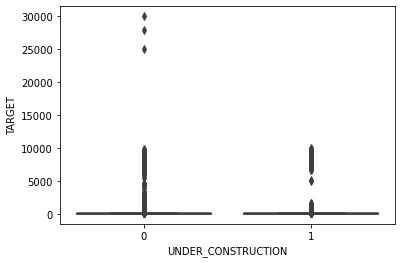

In [24]:
#checking for ouliers in under_counstruction column for that iam using boxplot
#boxplot is used when categorical grouping variable and a continuous outcome variable. 
sns.boxplot(x='UNDER_CONSTRUCTION',y='TARGET',data=df)

<AxesSubplot:xlabel='RESALE', ylabel='TARGET'>

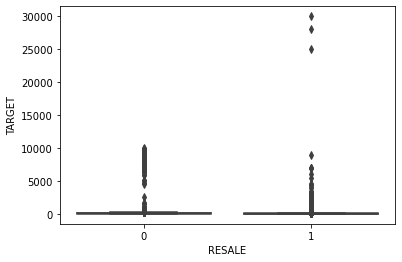

In [25]:
sns.boxplot(x='RESALE',y='TARGET',data=df)

<AxesSubplot:xlabel='BHK_OR_RK', ylabel='TARGET'>

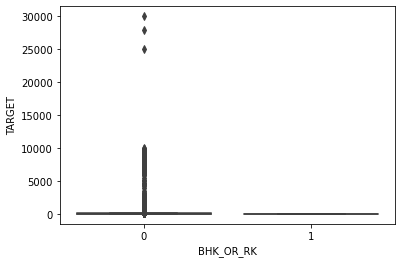

In [26]:
sns.boxplot(x='BHK_OR_RK',y='TARGET',data=df)

#####for all the boxplots plotted above had outliers